In [1]:
import json
with open("train_origin.json", "r") as f:
    content = f.read()
    data = json.loads(content)

In [2]:
all_cuisine = set([data[id]['cuisine'] for id in data])

In [3]:
all_cuisine = sorted(list(all_cuisine))

In [4]:
all_cuisine

['brazilian',
 'british',
 'cajun_creole',
 'chinese',
 'filipino',
 'french',
 'greek',
 'indian',
 'irish',
 'italian',
 'jamaican',
 'japanese',
 'korean',
 'mexican',
 'moroccan',
 'russian',
 'southern_us',
 'spanish',
 'thai',
 'vietnamese']

In [5]:
data["0"]

{'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [8]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")
lengths = [len(tokenizer.encode(" [SEP] ".join(data[id]['ingredients']))) for id in data]

In [10]:
max(lengths)

266

In [20]:
len([length for length in lengths if length>=100]) / len(lengths)

0.002702787642603476

In [15]:
import numpy as np
x = np.arange(300)
y = np.array([lengths.count(length) for length in range(300)])

Text(0, 0.5, 'number of text')

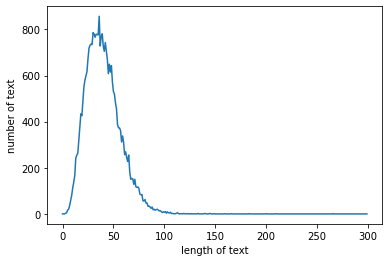

In [17]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("length of text")
plt.ylabel("number of text")

Text(0, 0.5, 'cumulative proportion of text / %')

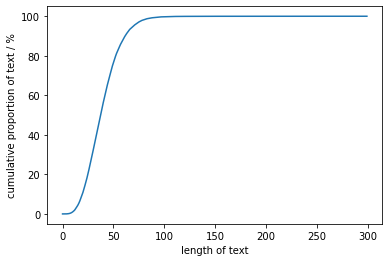

In [18]:
import matplotlib.pyplot as plt
plt.plot(x, 100*np.cumsum(y) / sum(y))
plt.xlabel("length of text")
plt.ylabel("cumulative proportion of text / %")